In [1]:
#!pip install opencv-python
#!pip install tensorflow

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd #for working with dataframes
import numpy as np  #for numerical computationss
import matplotlib.pyplot as plt #for plotting informations on graph and images using tensors
import os #for working with files
import cv2 # for image visualization(Computer Vision)
from tqdm.auto import tqdm #to show the progress bars
import glob as gb # search files that match specific file pattern or name

from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay ,f1_score
# metrices used for evalution of model
#sklearn lib to implement ml and statistical modeling
import tensorflow as tf #open source s/w focuses on training& interface of deep learning model(DNN)
from tensorflow import keras # deep learning library
from tensorflow.keras.models import Sequential #sequencing the processes
from tensorflow.keras.layers import Dense , Conv2D , MaxPool2D , Flatten # return copy of array in 1D
# 2d convolutional layer/creates conv kernel
from tensorflow.keras.optimizers import Adam # gradient descent(optimization algorithm)
# allow to compute moving average and overwrite model variables at desired time

In [3]:
#function showing the no. of directories and images in the dataset
def walk_through_data(dir_path) : 
    for dirpath , dirnames , filenames in tqdm(os.walk(dir_path)) : 
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [4]:
train_path = 'PlantVillage/train' #training dataset
val_path = 'PlantVillage/val'   #validation dataset
test_path = 'test' #test dataset

In [5]:
walk_through_data(train_path)# displaying no. of images in the train dataset

0it [00:00, ?it/s]

There are 38 directories and 0 images in PlantVillage/train
There are 0 directories and 504 images in PlantVillage/train\Apple___Apple_scab
There are 0 directories and 496 images in PlantVillage/train\Apple___Black_rot
There are 0 directories and 220 images in PlantVillage/train\Apple___Cedar_apple_rust
There are 0 directories and 1316 images in PlantVillage/train\Apple___healthy
There are 0 directories and 1202 images in PlantVillage/train\Blueberry___healthy
There are 0 directories and 684 images in PlantVillage/train\Cherry_(including_sour)___healthy
There are 0 directories and 842 images in PlantVillage/train\Cherry_(including_sour)___Powdery_mildew
There are 0 directories and 410 images in PlantVillage/train\Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
There are 0 directories and 953 images in PlantVillage/train\Corn_(maize)___Common_rust_
There are 0 directories and 929 images in PlantVillage/train\Corn_(maize)___healthy
There are 0 directories and 788 images in PlantVillag

In [6]:
walk_through_data(val_path) #images in validation dataset

0it [00:00, ?it/s]

There are 38 directories and 0 images in PlantVillage/val
There are 0 directories and 126 images in PlantVillage/val\Apple___Apple_scab
There are 0 directories and 125 images in PlantVillage/val\Apple___Black_rot
There are 0 directories and 55 images in PlantVillage/val\Apple___Cedar_apple_rust
There are 0 directories and 329 images in PlantVillage/val\Apple___healthy
There are 0 directories and 300 images in PlantVillage/val\Blueberry___healthy
There are 0 directories and 170 images in PlantVillage/val\Cherry_(including_sour)___healthy
There are 0 directories and 210 images in PlantVillage/val\Cherry_(including_sour)___Powdery_mildew
There are 0 directories and 103 images in PlantVillage/val\Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
There are 0 directories and 239 images in PlantVillage/val\Corn_(maize)___Common_rust_
There are 0 directories and 233 images in PlantVillage/val\Corn_(maize)___healthy
There are 0 directories and 197 images in PlantVillage/val\Corn_(maize)___Nort

In [7]:
walk_through_data(test_path)# images in test dataset

0it [00:00, ?it/s]

There are 1 directories and 0 images in test
There are 0 directories and 53 images in test\test


In [8]:
extension=[]
classes = [] 

for folder in tqdm(os.listdir(train_path)) : 
    
    if folder not in classes : 
        classes.append(folder) 
        
    for file in os.listdir(train_path + "/" + folder + "/") : 
        if os.path.isfile(train_path + "/" + folder + "/" + file) : 
            extension.append(os.path.splitext(file)[1])

  0%|          | 0/38 [00:00<?, ?it/s]

In [9]:
print(len(extension) , np.unique(extension)) #file content count and unique extensions

43444 ['.JPG' '.jpeg' '.jpg' '.png']


In [10]:
len(classes) #number of classes

38

In [11]:
dataset_labels = {key : value for value , key in enumerate(classes)}
dataset_labels

# labeling the dataset into key value pairs

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___healthy': 5,
 'Cherry_(including_sour)___Powdery_mildew': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___healthy': 9,
 'Corn_(maize)___Northern_Leaf_Blight': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___healthy': 13,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___healthy': 21,
 'Potato___Late_blight': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___healthy': 26,
 'Strawberry___Leaf_scorch': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [12]:
def getlabel(n) : 
    for x , y in dataset_labels.items() : 
        if n==y : 
            return x

In [13]:
img_size = 100 #setting image size to 100px

In [14]:
train_images = [] 
train_labels = [] 
#training
# appending the images in form of list and labeles the folders
for folder in tqdm(os.listdir(train_path)) : 
    files = gb.glob(pathname = str(train_path + "/" + folder + "/*.JPG")) + gb.glob(pathname = str(train_path + "/" + folder + "/*.jpg"))
    for file in files : 
        img = cv2.imread(file) 
        img = cv2.resize(img , (img_size , img_size))
        img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
        train_images.append(list(img)) 
        train_labels.append(dataset_labels[folder])

  0%|          | 0/38 [00:00<?, ?it/s]

In [15]:
np.array(train_images).shape , np.array(train_labels).shape #shape(labels,height,width,)

((86884, 100, 100, 3), (86884,))

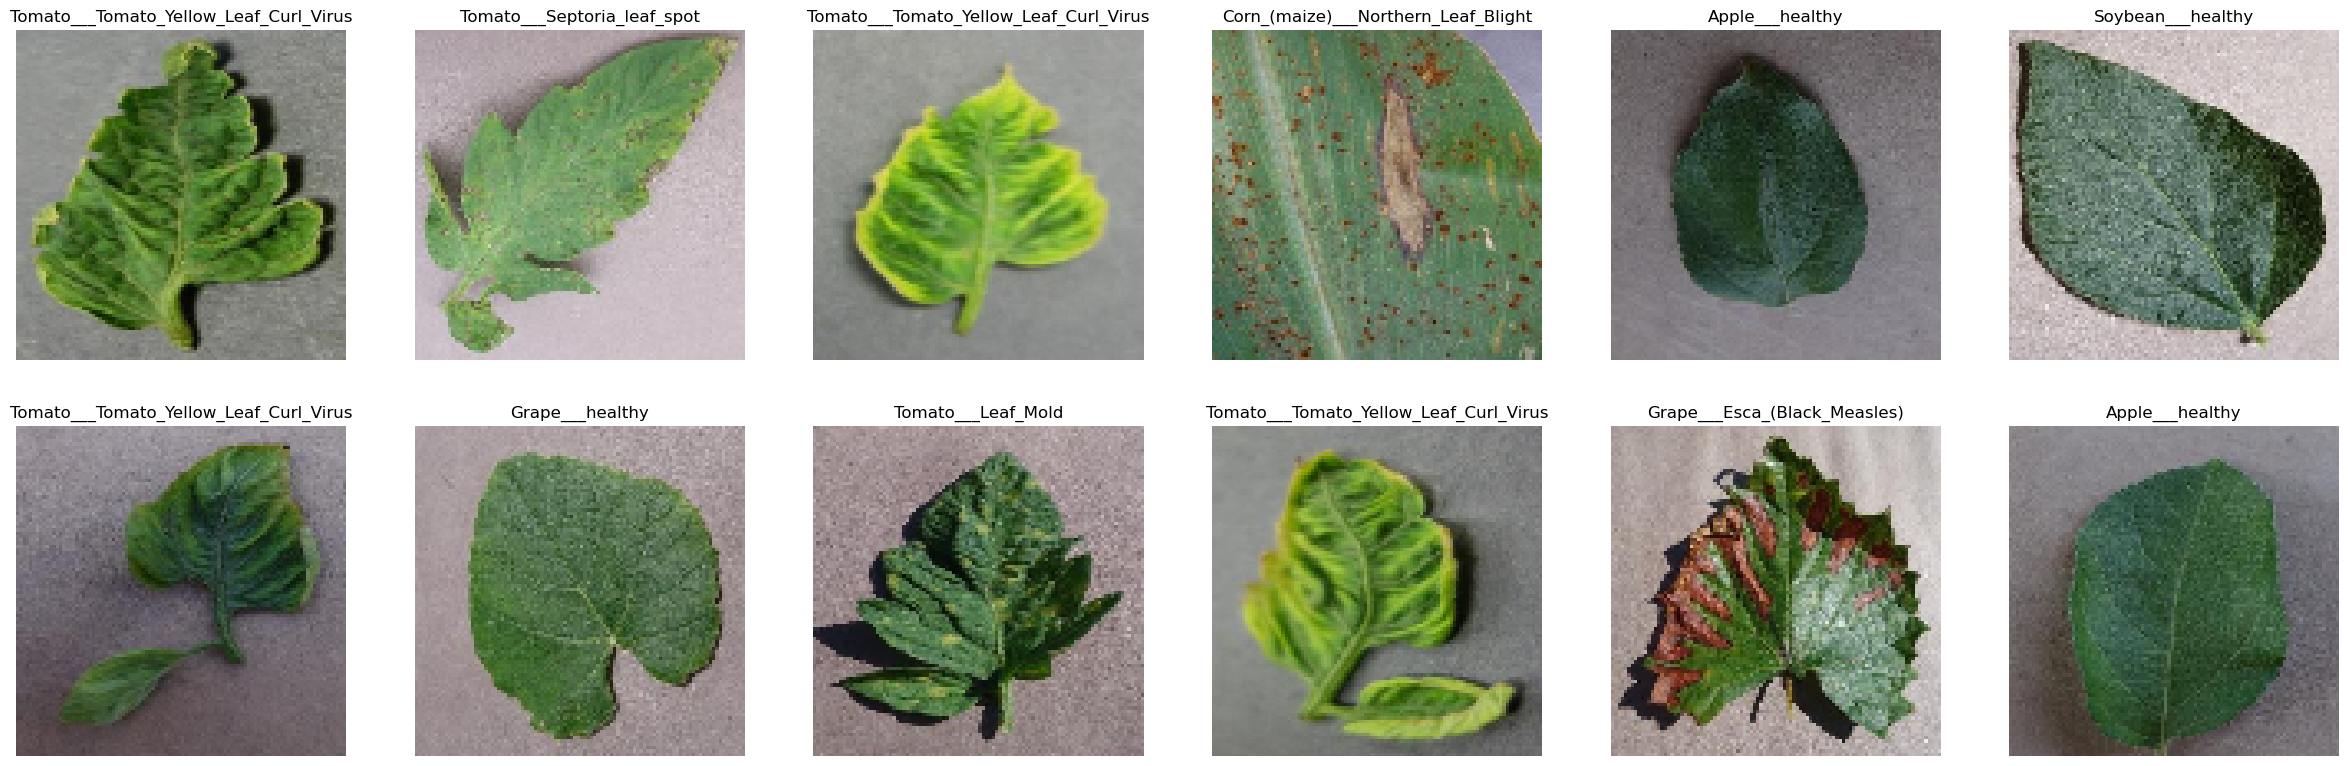

In [16]:
plt.figure(figsize=(30,30))
#showing the random 12 images from the training dataset
for n , i in enumerate(list(np.random.randint(0 , len(train_images) , 12))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(train_images[i])
    plt.axis('off')
    plt.title(getlabel(train_labels[i]))

In [17]:
val_images = [] 
val_labels = [] 
#validation
# appending the images in form of list and labeles the folders
for folder in tqdm(os.listdir(val_path)) : 
    files = gb.glob(pathname = str(val_path + "/" + folder + "/*.JPG")) + gb.glob(pathname = str(val_path + "/" + folder + "/*.jpg"))
    for file in files : 
        img = cv2.imread(file) 
        img = cv2.resize(img , (img_size , img_size)) 
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        val_images.append(list(img))
        val_labels.append(dataset_labels[folder])

  0%|          | 0/38 [00:00<?, ?it/s]

In [18]:
np.array(val_images).shape , np.array(val_labels).shape #(labels,height,width,)

((21722, 100, 100, 3), (21722,))

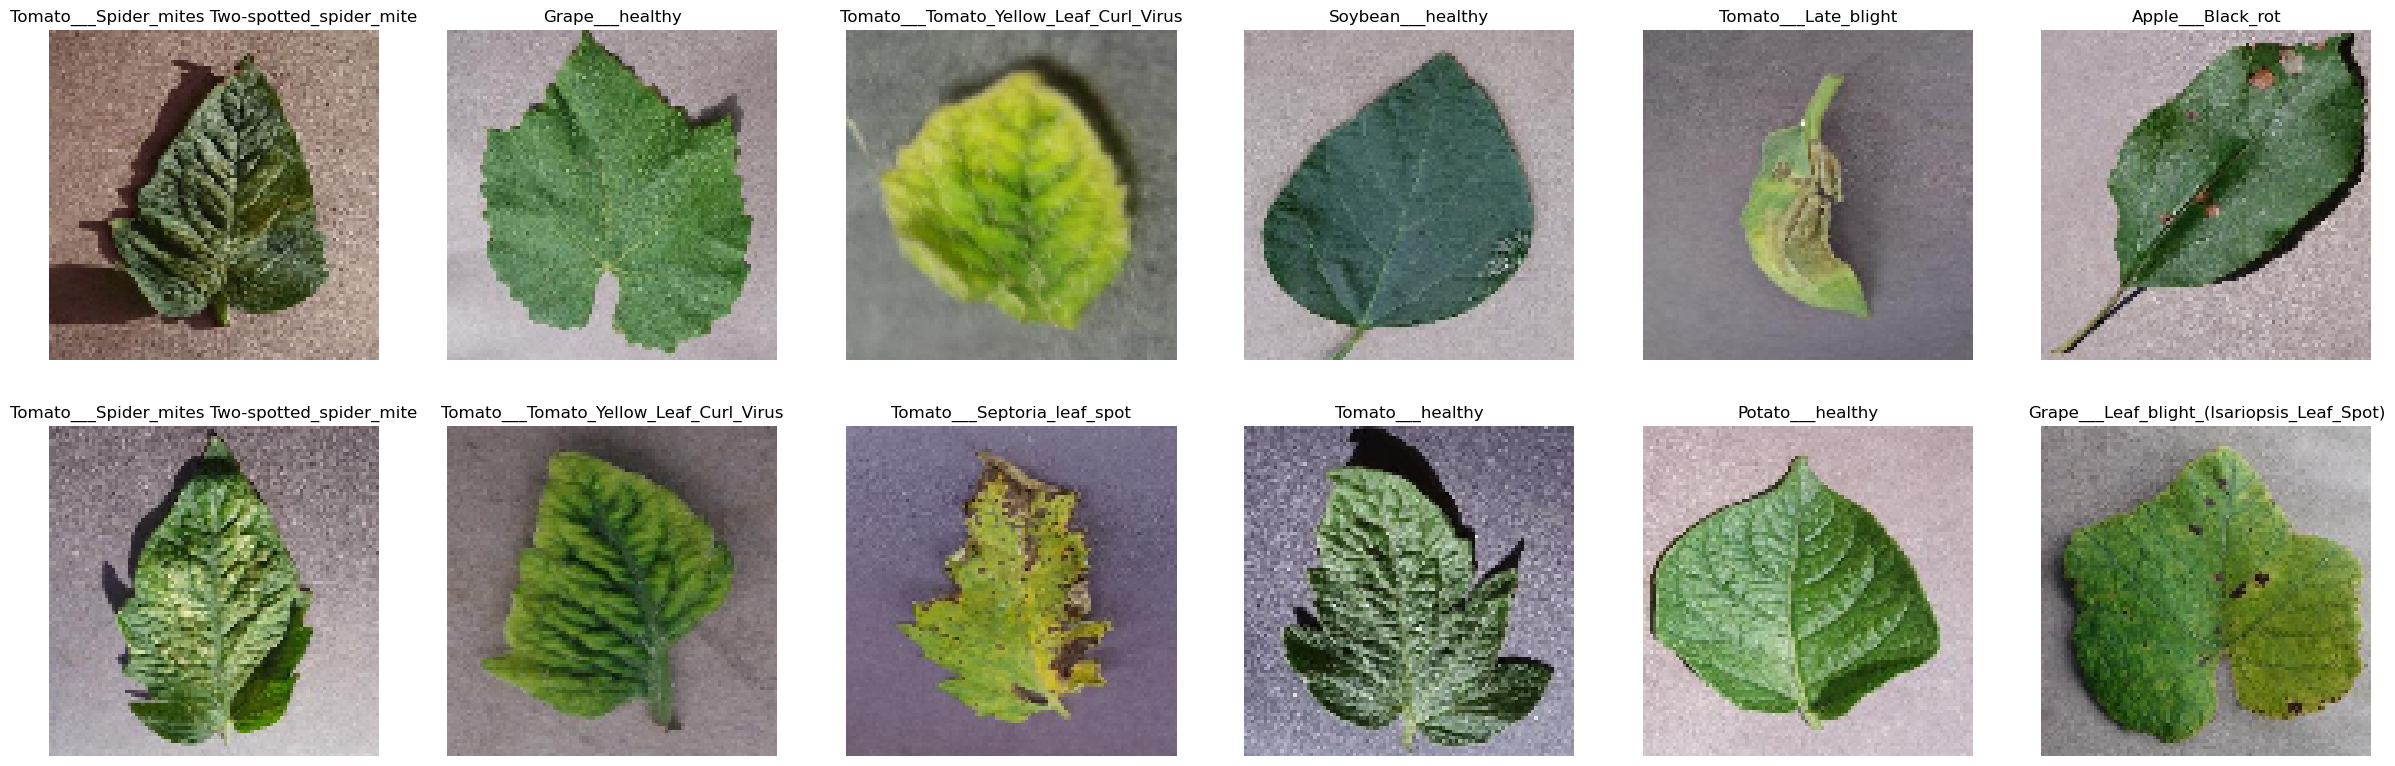

In [19]:
plt.figure(figsize=(30,30))
#showing the random 12 images from the training dataset
for n , i in enumerate(list(np.random.randint(0 , len(val_images) , 12))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(val_images[i])
    plt.axis('off')
    plt.title(getlabel(val_labels[i]))

In [20]:
test_images = [] 
#testing
# appending the images in form of list and labeles the folders
for folder in tqdm(os.listdir(test_path)) : 
    files = gb.glob(pathname = str(test_path + "/" + folder + "/*.JPG")) + gb.glob(pathname = str(test_path + "/" + folder + "/*.jpg")) 
    for file in files : 
        img = cv2.imread(file) 
        img = cv2.resize(img , (img_size , img_size)) 
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        test_images.append(list(img))

  0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
np.array(test_images).shape #(labels,height,width,)

(106, 100, 100, 3)

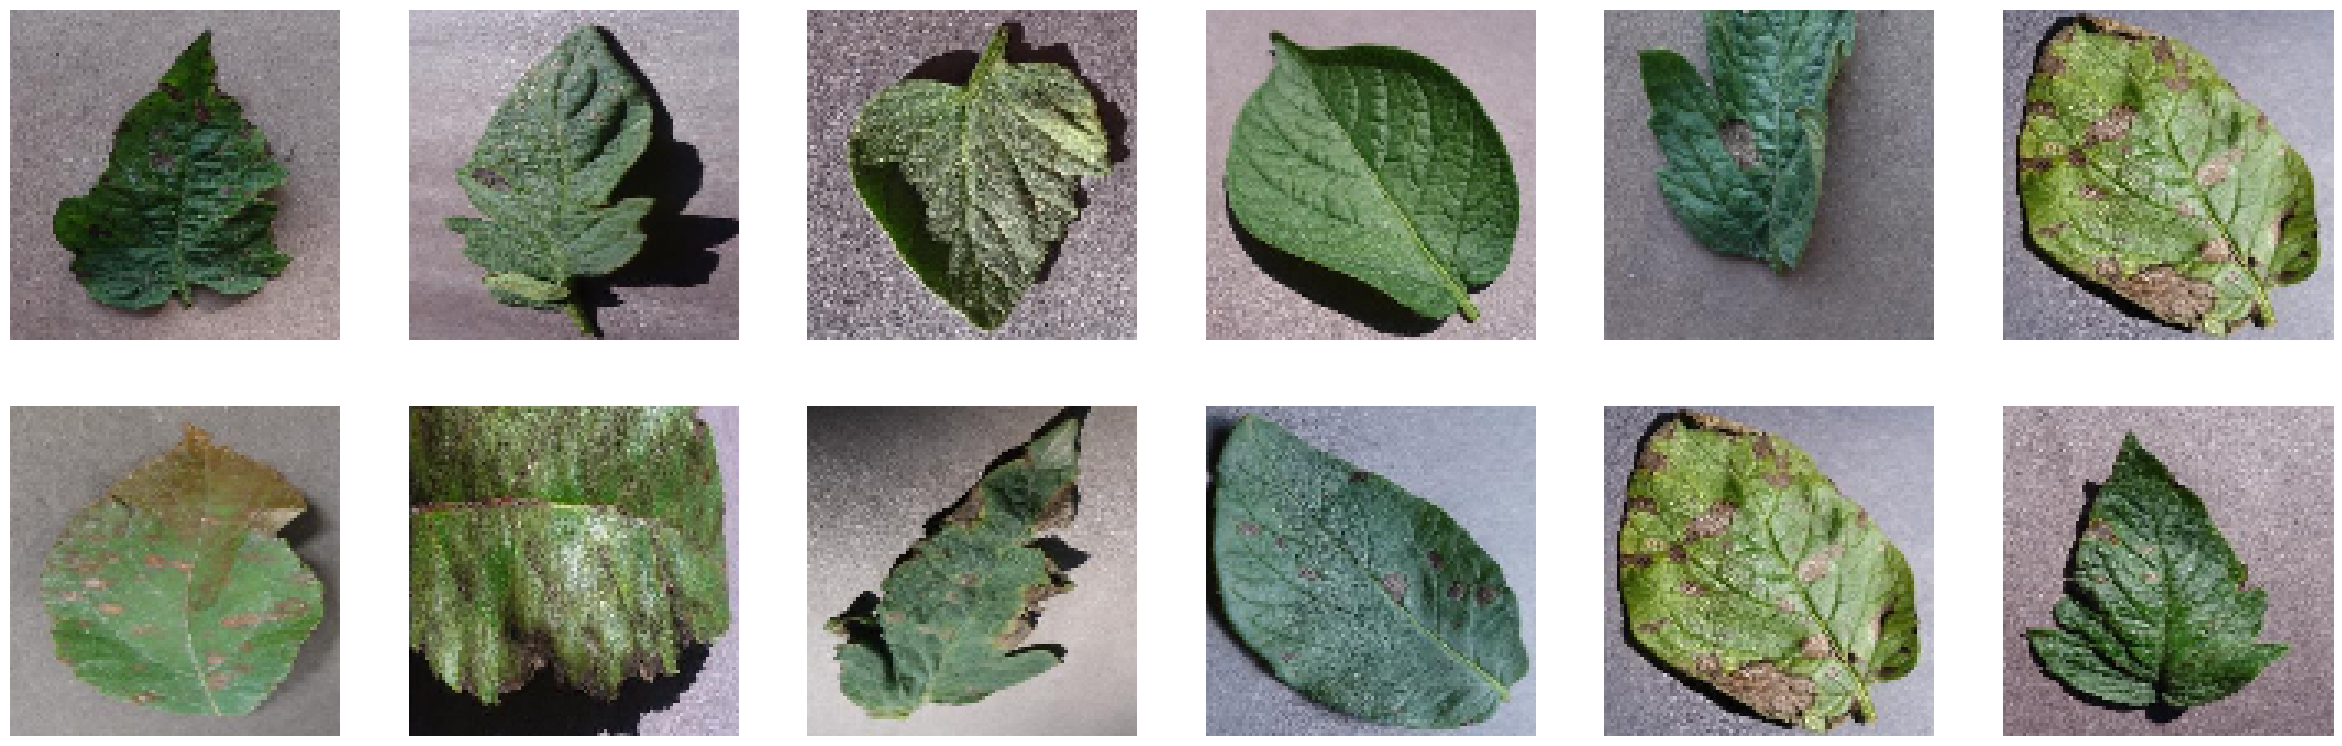

In [22]:
plt.figure(figsize=(30,30))
for n , i in enumerate(list(np.random.randint(0 , len(test_images) , 12))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(test_images[i])
    plt.axis('off')

In [23]:
# taking data for model training and testing (spliting)
x_train = np.array(train_images)
y_train = np.array(train_labels)
x_test = np.array(val_images)
y_test = np.array(val_labels)
x_preds = np.array(test_images)

In [24]:
#converting into float type
x_train = x_train.astype('float32')
x_train = x_train / 255.0 

x_test = x_test.astype('float32')
x_test = x_test / 255.0 

x_preds = x_preds.astype('float32')
x_preds = x_preds / 255.0 

In [25]:
print (" Shape before one-hot encoding : ", y_train.shape)
y_train= tf.keras.utils.to_categorical(y_train,len(classes))# labels,length of classes
y_test = tf.keras.utils.to_categorical(y_test,len(classes))
print (" Shape after one-hot encoding : ", y_train.shape)
print (" Shape after one-hot encoding : ", y_test.shape)

 Shape before one-hot encoding :  (86884,)
 Shape after one-hot encoding :  (86884, 38)
 Shape after one-hot encoding :  (21722, 38)


In [54]:
#CNN's layering
model = Sequential([
    Conv2D(32 , kernel_size = (3,3) , activation='relu' ,input_shape=(img_size , img_size , 3)) , 
    MaxPool2D(4,4) ,
    Conv2D(64 , kernel_size = (3,3) , activation='relu') , 
    MaxPool2D(4,4) ,
    Conv2D(16 , kernel_size = (2,2) , activation='relu') , 
    MaxPool2D(2,2) ,
    Flatten() , 
    Dense(128 , activation='relu') , 
    Dense(len(classes) , activation = 'softmax')
])#add one more ie 16

In [55]:
#layers, parameters 
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 4, 4, 16)          4112      
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 2, 2, 16)         

In [56]:
#compiling
model.compile(optimizer=Adam(0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [57]:
#model fitting(fit-transform)
#training set 
#model training
history=model.fit(x_train,y_train,epochs=20,batch_size=32,verbose=1)

Epoch 1/20
2716/2716 [==============================] - 102s 37ms/step - loss: 1.3613 - accuracy: 0.6068
Epoch 2/20
2716/2716 [==============================] - 92s 34ms/step - loss: 0.6202 - accuracy: 0.8033
Epoch 3/20
2716/2716 [==============================] - 94s 34ms/step - loss: 0.4609 - accuracy: 0.8505
Epoch 4/20
2716/2716 [==============================] - 109s 40ms/step - loss: 0.3712 - accuracy: 0.8775
Epoch 5/20
2716/2716 [==============================] - 103s 38ms/step - loss: 0.3188 - accuracy: 0.8934
Epoch 6/20
2716/2716 [==============================] - 104s 38ms/step - loss: 0.2743 - accuracy: 0.9070
Epoch 7/20
2716/2716 [==============================] - 99s 37ms/step - loss: 0.2415 - accuracy: 0.9170
Epoch 8/20
2716/2716 [==============================] - 93s 34ms/step - loss: 0.2162 - accuracy: 0.9262
Epoch 9/20
2716/2716 [==============================] - 94s 34ms/step - loss: 0.1982 - accuracy: 0.9314
Epoch 10/20
2716/2716 [==============================] - 97s

In [58]:
#Accuracy of the model
print(f"The accuracy of the training set is {history.history['accuracy'][-1]:0.2f}")

The accuracy of the training set is 0.97


In [59]:
#loss while training the model
print(f"The loss of the training set is {history.history['loss'][-1]:0.2f}")

The loss of the training set is 0.10


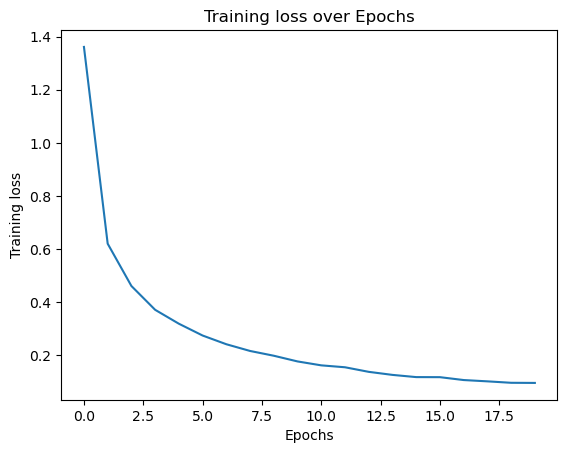

In [60]:
#loss over epochs
plt.plot(history.epoch, history.history['loss'])
plt.title('Training loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.show()

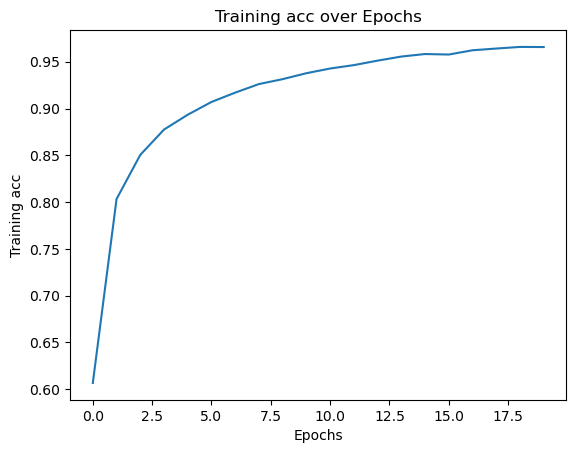

In [61]:
#accuracy over epochs
plt.plot(history.epoch, history.history['accuracy'])
plt.title('Training acc over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training acc')
plt.show()

In [62]:
#evaluating test set
test_loss , test_acc = model.evaluate(x_test,y_test,batch_size=32)

679/679 [==============================] - 12s 16ms/step - loss: 0.3244 - accuracy: 0.9141


In [63]:
#testing accuracy
print(f"The accuracy of the testing set is : {test_acc*100}")

The accuracy of the testing set is : 91.40962958335876


In [64]:
#testing loss
print(f"The loss of the testing set is : {test_loss}")

The loss of the testing set is : 0.3243754208087921


In [65]:
y_preds=model.predict(x_preds)

4/4 [==============================] - 0s 16ms/step


In [66]:
y_preds=y_preds.round()

In [67]:
x_preds_labels = [] 

for folder in tqdm(os.listdir(test_path)) :     
    for file in os.listdir(test_path + "/" + folder + "/") : 
        if os.path.isfile(test_path + "/" + folder + "/" + file) : 
            x_preds_labels.append(os.path.splitext(file)[0]) 

  0%|          | 0/1 [00:00<?, ?it/s]

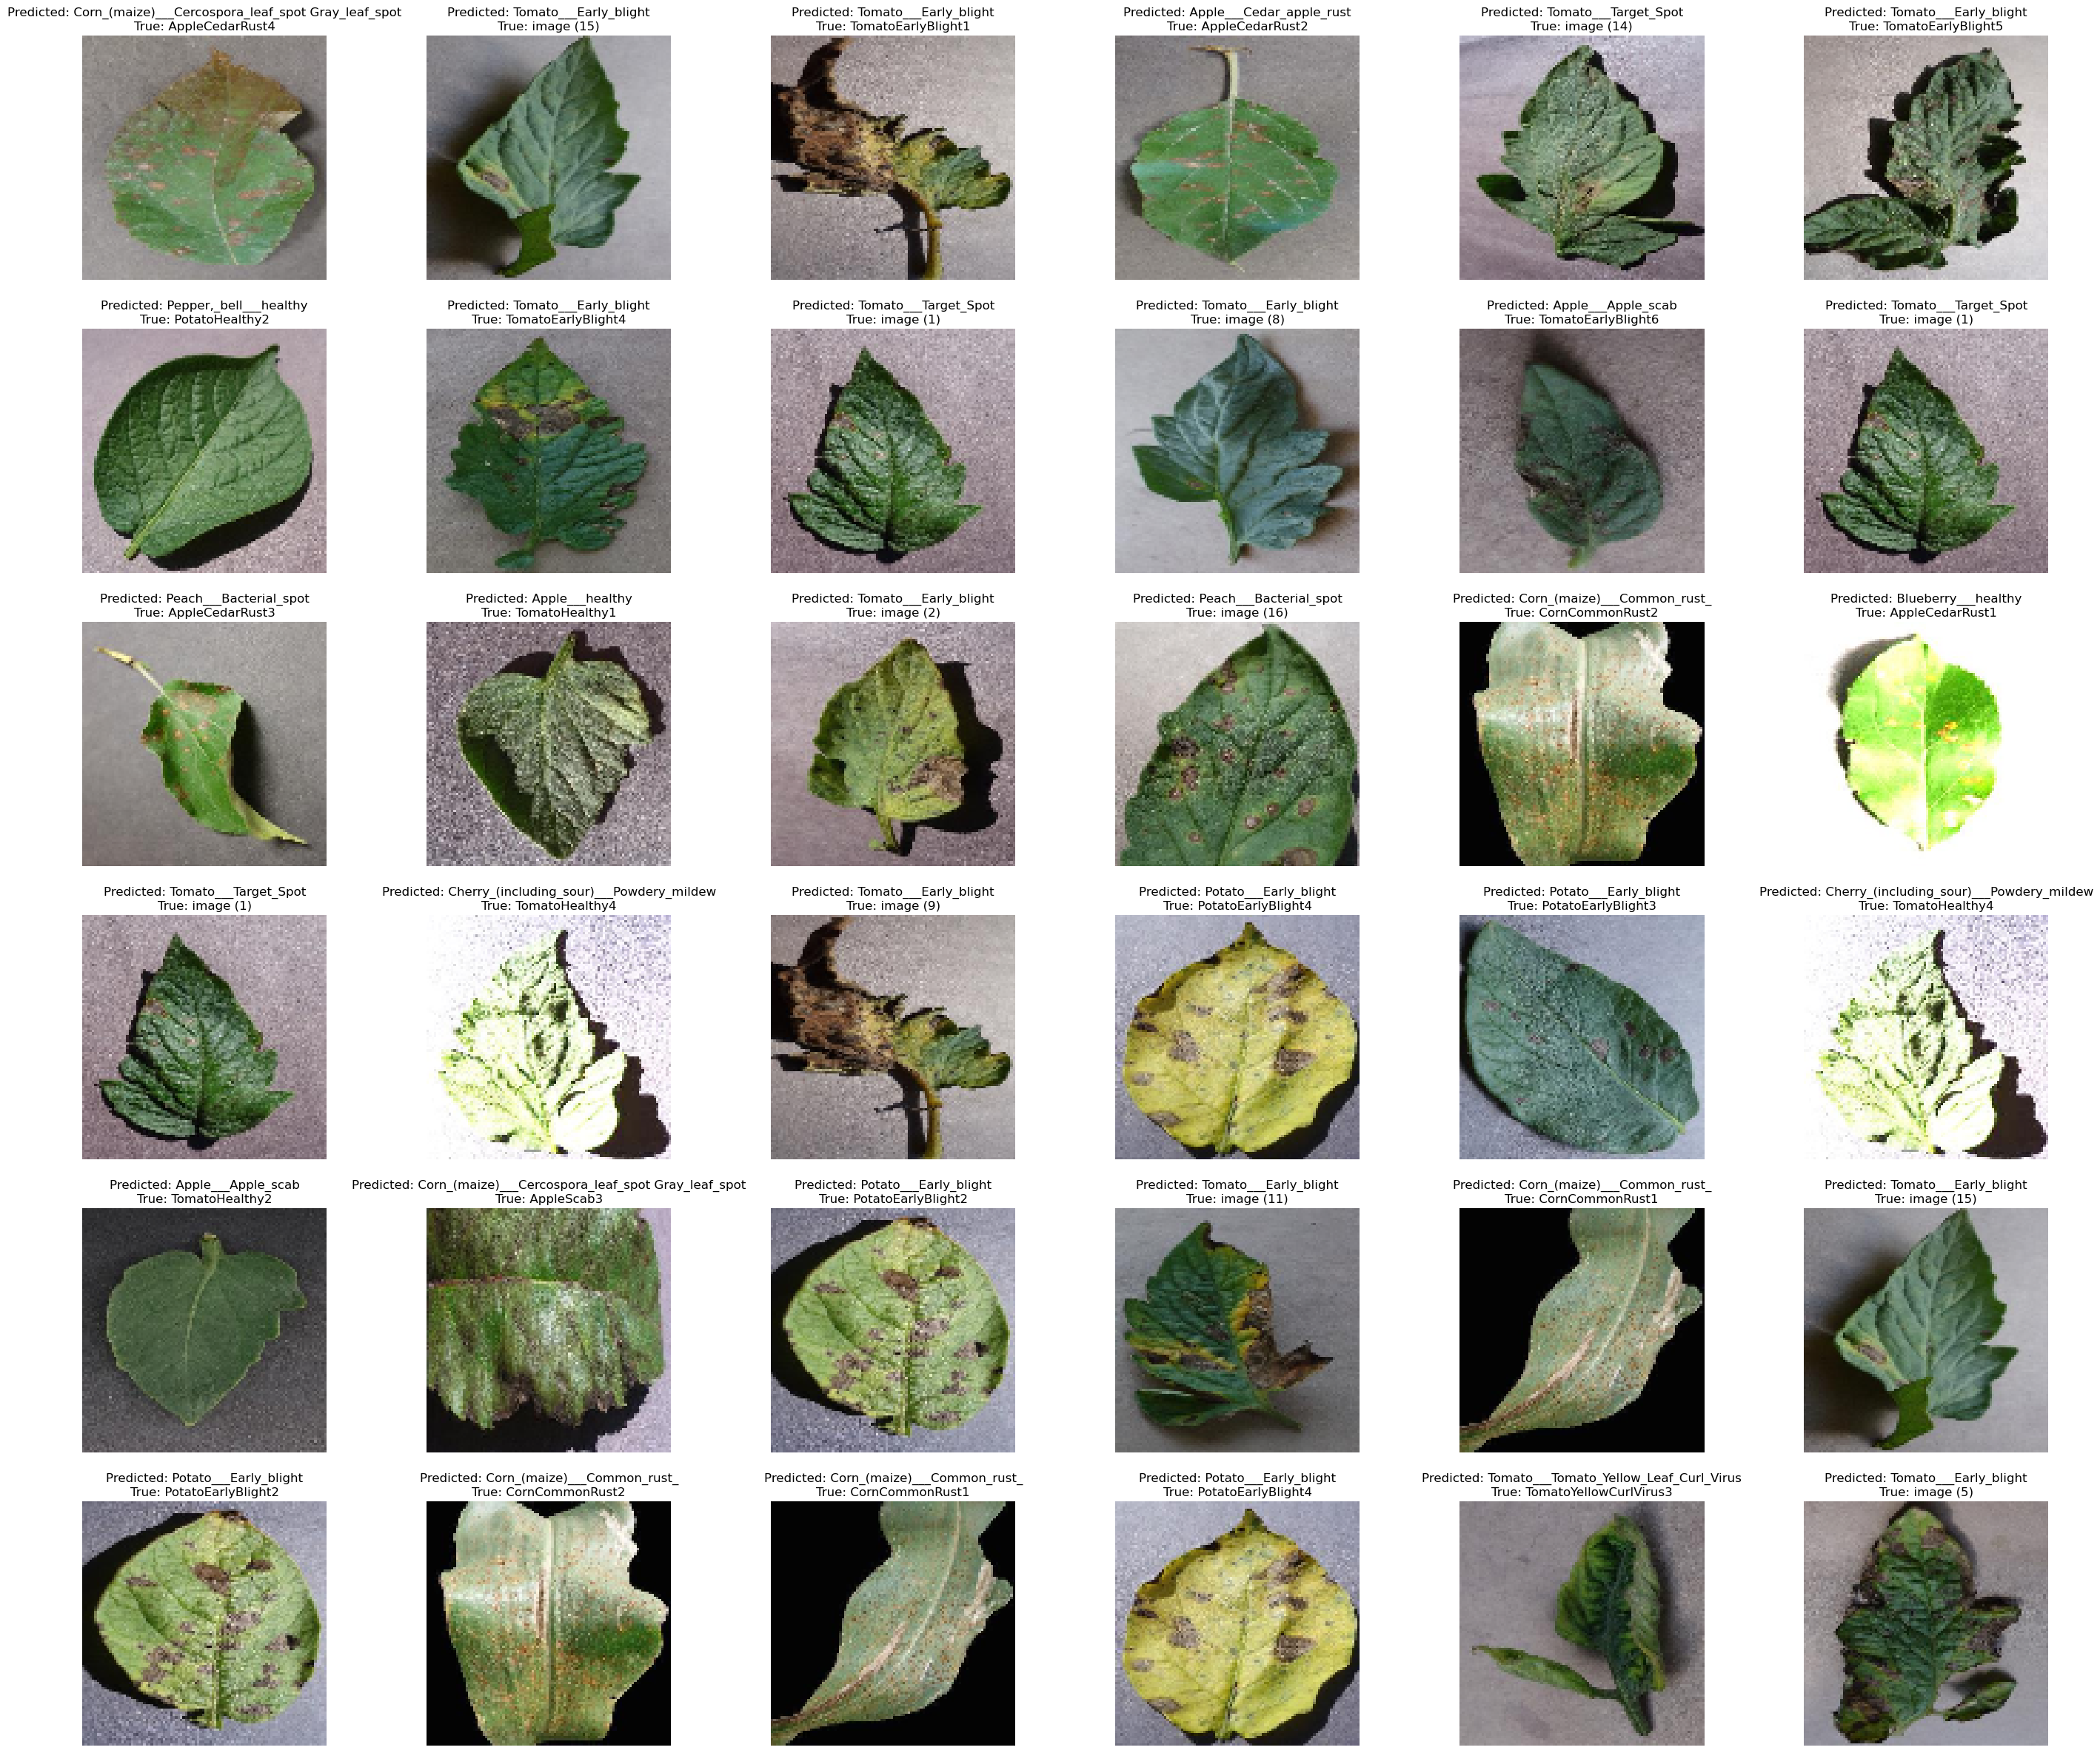

In [68]:
#predicted vs acctual
plt.figure(figsize=(35, 30))
for n, i in enumerate(list(np.random.randint(0, min(len(x_preds), len(x_preds_labels)), 36))):
    plt.subplot(6, 6, n+1)
    
    # Assuming x_preds is a 3D array (img_size, img_size, 3)
    plt.imshow(x_preds[i].reshape(img_size, img_size, 3), cmap='gray')  
    
    if i < len(y_preds):
        plt.title(f"Predicted: {getlabel(y_preds[i].argmax())}\nTrue: {x_preds_labels[i]}")
    else:
        plt.title(f"Actual: {x_preds_labels[i]}")
    
    plt.axis('off')

plt.show()

In [69]:
#model.save("/output/g1mode45.h5")

In [70]:
# import zipfile
# import os
# from IPython.display import FileLink

# def zip_dir(directory = "/output", file_name = 'directory.zip'):
#     """
#     zip all the files in a directory
    
#     Parameters
#     _____
#     directory: str
#         directory needs to be zipped, defualt is current working directory
        
#     file_name: str
#         the name of the zipped file (including .zip), default is 'directory.zip'
        
#     Returns
#     _____
#     Creates a hyperlink, which can be used to download the zip file)
#     """
#     os.chdir(directory)
#     zip_ref = zipfile.ZipFile(file_name, mode='w')
#     for folder, _, files in os.walk(directory):
#         for file in files:
#             if file_name in file:
#                 pass
#             else:
#                 zip_ref.write(os.path.join(folder, file))

#     return FileLink(file_name)

In [71]:
# zip_dir()

In [72]:
#file url given and noted prediction of model
file = "test/test/TomatoYellowCurlVirus2.JPG"
img = cv2.imread(file)
if img is None:
    print(f"Error: Unable to load image from file: {file}")
    
# Check and print the model input shape
print("Model Input Shape:", model.input_shape)

# Assuming model.input_shape is of the form (None, height, width, channels)
input_shape = model.input_shape[1:3]  # Extracting the height and width
x = cv2.resize(img, (input_shape[0], input_shape[1]))
x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
x = np.array([x,])
x = x.astype('float32') / 255.0

# Continue with the prediction
y = model.predict(x)
y = y.round()
getlabel(y.argmax())    
    

Model Input Shape: (None, 100, 100, 3)
1/1 [==============================] - 0s 44ms/step


'Tomato___Tomato_Yellow_Leaf_Curl_Virus'